Agent Parameters Metrics:
RMSE: 195.52 m³/s
Bias: -79.21 m³/s (-76.8%)
CC: 0.79
NSCE: 0.09
KGE: -0.15

Default Parameters Metrics:
RMSE: 205.14 m³/s
Bias: -81.31 m³/s (-78.9%)
CC: 0.65
NSCE: 0.00
KGE: -0.22


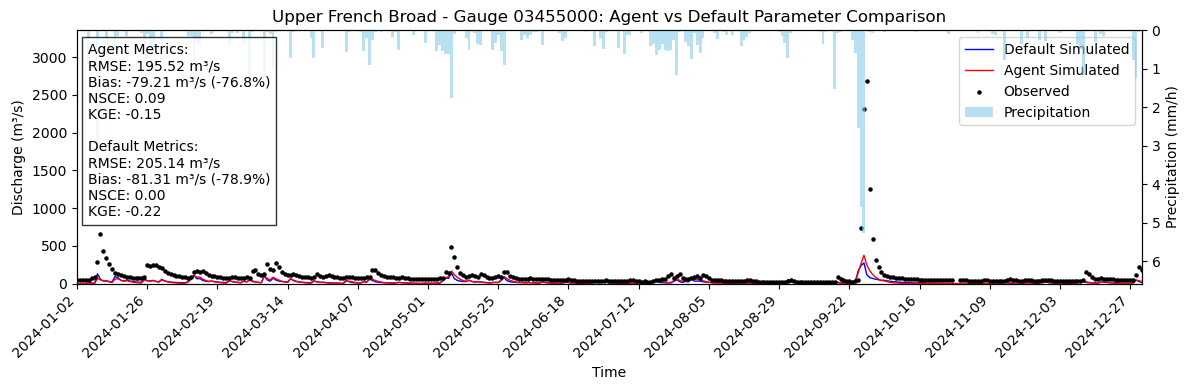

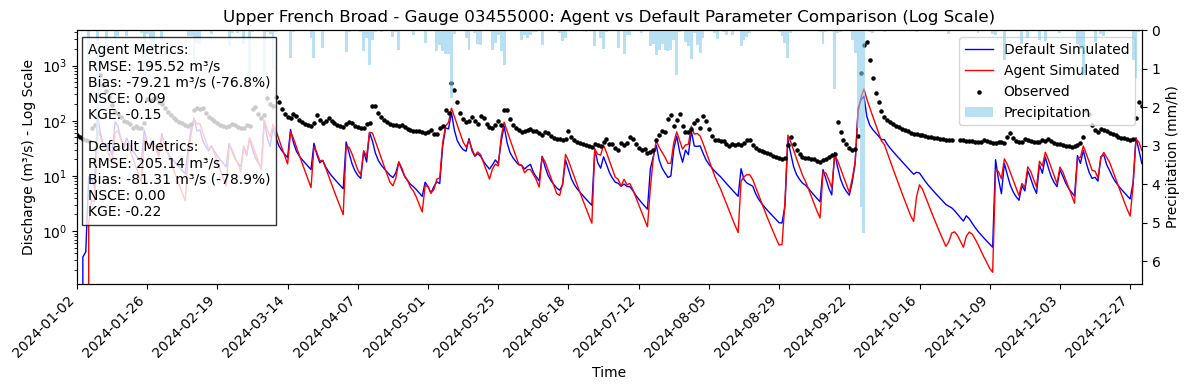

In [9]:
# Read the two CSV files
ts_file_agent = r"default_param\hurricane_comp\ts.03455000.crest_agent.csv"
ts_file_default = r"default_param\hurricane_comp\ts.03455000.crest_default.csv"

df_agent = pd.read_csv(ts_file_agent)
df_default = pd.read_csv(ts_file_default)

# Calculate metrics for agent parameters
sim_agent = df_agent['Discharge(m^3 s^-1)'].values
obs_agent = df_agent['Observed(m^3 s^-1)'].values
valid_indices_agent = ~(np.isnan(sim_agent) | np.isnan(obs_agent))
sim_agent = sim_agent[valid_indices_agent]
obs_agent = obs_agent[valid_indices_agent]

rmse_agent = np.sqrt(np.mean((sim_agent - obs_agent) ** 2))
bias_agent = np.mean(sim_agent - obs_agent)
bias_percent_agent = (bias_agent / np.mean(obs_agent)) * 100
cc_agent = np.corrcoef(sim_agent, obs_agent)[0, 1]
mean_obs_agent = np.mean(obs_agent)
nsce_agent = 1 - (np.sum((sim_agent - obs_agent) ** 2) / np.sum((obs_agent - mean_obs_agent) ** 2))
r_agent = cc_agent
alpha_agent = np.std(sim_agent) / np.std(obs_agent)
beta_agent = np.mean(sim_agent) / np.mean(obs_agent)
kge_agent = 1 - np.sqrt((r_agent - 1)**2 + (alpha_agent - 1)**2 + (beta_agent - 1)**2)

# Calculate metrics for default parameters
sim_default = df_default['Discharge(m^3 s^-1)'].values
obs_default = df_default['Observed(m^3 s^-1)'].values
valid_indices_default = ~(np.isnan(sim_default) | np.isnan(obs_default))
sim_default = sim_default[valid_indices_default]
obs_default = obs_default[valid_indices_default]

rmse_default = np.sqrt(np.mean((sim_default - obs_default) ** 2))
bias_default = np.mean(sim_default - obs_default)
bias_percent_default = (bias_default / np.mean(obs_default)) * 100
cc_default = np.corrcoef(sim_default, obs_default)[0, 1]
mean_obs_default = np.mean(obs_default)
nsce_default = 1 - (np.sum((sim_default - obs_default) ** 2) / np.sum((obs_default - mean_obs_default) ** 2))
r_default = cc_default
alpha_default = np.std(sim_default) / np.std(obs_default)
beta_default = np.mean(sim_default) / np.mean(obs_default)
kge_default = 1 - np.sqrt((r_default - 1)**2 + (alpha_default - 1)**2 + (beta_default - 1)**2)

# Print metrics comparison
print("Agent Parameters Metrics:")
print(f"RMSE: {rmse_agent:.2f} m³/s")
print(f"Bias: {bias_agent:.2f} m³/s ({bias_percent_agent:.1f}%)")
print(f"CC: {cc_agent:.2f}")
print(f"NSCE: {nsce_agent:.2f}")
print(f"KGE: {kge_agent:.2f}")
print("\nDefault Parameters Metrics:")
print(f"RMSE: {rmse_default:.2f} m³/s")
print(f"Bias: {bias_default:.2f} m³/s ({bias_percent_default:.1f}%)")
print(f"CC: {cc_default:.2f}")
print(f"NSCE: {nsce_default:.2f}")
print(f"KGE: {kge_default:.2f}")

# Create figure with two y-axes for normal scale
fig, ax1 = plt.subplots(figsize=(12, 4))
ax2 = ax1.twinx()

# Add metrics text on the left side
metrics_text = (f"Agent Metrics:\n"
               f"RMSE: {rmse_agent:.2f} m³/s\n"
               f"Bias: {bias_agent:.2f} m³/s ({bias_percent_agent:.1f}%)\n"
               f"NSCE: {nsce_agent:.2f}\n"
               f"KGE: {kge_agent:.2f}\n\n"
               f"Default Metrics:\n"
               f"RMSE: {rmse_default:.2f} m³/s\n"
               f"Bias: {bias_default:.2f} m³/s ({bias_percent_default:.1f}%)\n"
               f"NSCE: {nsce_default:.2f}\n"
               f"KGE: {kge_default:.2f}")
plt.text(0.01, 0.95, metrics_text, transform=ax1.transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Plot precipitation as bar chart on right y-axis (inverted)
ax2.bar(range(len(df_agent)), df_agent['Precip(mm h^-1)'], color='skyblue', alpha=0.6, width=1.0, label='Precipitation', zorder=1)
ax2.set_ylabel('Precipitation (mm/h)')
ax2.invert_yaxis()
max_precip = df_agent['Precip(mm h^-1)'].max()
ax2.set_ylim(max_precip / 0.8, 0)

# Plot discharge on left y-axis
# Default simulation - blue
ax1.plot(df_default['Time'], df_default['Discharge(m^3 s^-1)'], label='Default Simulated', linewidth=1, color='blue', zorder=3)
# Agent simulation - red
ax1.plot(df_agent['Time'], df_agent['Discharge(m^3 s^-1)'], label='Agent Simulated', linewidth=1, color='red', zorder=3)
# Observed data - black
ax1.scatter(df_agent['Time'], df_agent['Observed(m^3 s^-1)'], label='Observed', s=5, color='black', zorder=4)

ax1.set_xlabel('Time')
ax1.set_ylabel('Discharge (m³/s)')

# Set y-axis limit
max_observed = df_agent['Observed(m^3 s^-1)'].max()
max_simulated_agent = df_agent['Discharge(m^3 s^-1)'].max()
max_simulated_default = df_default['Discharge(m^3 s^-1)'].max()
max_discharge = max(max_observed, max_simulated_agent, max_simulated_default)
ax1.set_ylim(0, max_discharge / 0.8)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Set title
plt.title('Upper French Broad - Gauge 03455000: Agent vs Default Parameter Comparison')

# Set x-axis limits and labels
ax1.set_xlim(df_agent['Time'].iloc[0], df_agent['Time'].iloc[-1])
step = 24  # Show every 24th tick
ax1.set_xticks(range(0, len(df_agent), step))
ax1.set_xticklabels([t.split()[0] for t in df_agent['Time'][::step]], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Create second figure with log scale y-axis
fig2, ax3 = plt.subplots(figsize=(12, 4))
ax4 = ax3.twinx()

# Add metrics text on the left side
plt.text(0.01, 0.95, metrics_text, transform=ax3.transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Plot precipitation
ax4.bar(range(len(df_agent)), df_agent['Precip(mm h^-1)'], color='skyblue', alpha=0.6, width=1.0, label='Precipitation', zorder=1)
ax4.set_ylabel('Precipitation (mm/h)')
ax4.invert_yaxis()
ax4.set_ylim(max_precip / 0.8, 0)

# Plot discharge with log scale
# Default simulation - blue
ax3.plot(df_default['Time'], df_default['Discharge(m^3 s^-1)'], label='Default Simulated', linewidth=1, color='blue', zorder=3)
# Agent simulation - red
ax3.plot(df_agent['Time'], df_agent['Discharge(m^3 s^-1)'], label='Agent Simulated', linewidth=1, color='red', zorder=3)
# Observed data - black
observed_log = df_agent['Observed(m^3 s^-1)'].apply(lambda x: max(x, 0.001) if not np.isnan(x) else np.nan)
ax3.scatter(df_agent['Time'], observed_log, label='Observed', s=5, color='black', zorder=4)
ax3.set_xlabel('Time')
ax3.set_ylabel('Discharge (m³/s) - Log Scale')
ax3.set_yscale('log')

# Add legends
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3 + labels4, loc='upper right')

# Set title
plt.title('Upper French Broad - Gauge 03455000: Agent vs Default Parameter Comparison (Log Scale)')

# Set x-axis limits and labels
ax3.set_xlim(df_agent['Time'].iloc[0], df_agent['Time'].iloc[-1])
ax3.set_xticks(range(0, len(df_agent), step))
ax3.set_xticklabels([t.split()[0] for t in df_agent['Time'][::step]], rotation=45, ha='right')

plt.tight_layout()
plt.show()
